# Taller 4

## Métodos Computacionales 2

Instrucciones: Suba el jupyter notebook **.ipynb** en la actividad de bloque neon. El archivo debe ser nombrado ApellidoNombreApellidoNombre_Taller4.ipynb, con su primer Apellido y Nombre. **El archivo debe poder correr en el binder del curso** 

Si un ejercicio demora **más de 10 segundos** en correr se considerará **incorrecto**.

La simulación no debe demorar más de **50 segundos** en google colab o se considerará incorrecto. 

No modifique el cuaderno, ni los modos de lectura de los archivos.

**Entrega: Sábado 27 de Mayo 11:59 pm**

## Librerias

In [ ]:
import time
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
from matplotlib import colors
plt.style.use('dark_background')

In [ ]:
from matplotlib import rc
rc("animation", html = "jshtml")

## Problema 1 (2/5) puntos

Dada la ecuación de onda bidimensional, 

$$ \frac{\partial^2 u}{\partial t^2} =
{c^2} \left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)$$

Demuestre que la solución de la ecuación de onda bidimensional con diferencias finitas para extremos fijos está dada por, 

$$
u^1_{i, j} = \frac{a}{2}u^0_{i, j} + V^0_{i, j}\Delta t + \frac{r_x}{2}(u^0_{i+1, j} + u^0_{i-1, j}) + \frac{r_y}{2}(u^0_{i, j+1}+u^0_{i, j-1})
$$

$$
u^{n+1}_{i, j} = au^n_{i, j} - u_{i, j}^{n-1} + r_x(u^n_{i+1, j} + u^n_{i-1, j}) + r_y(u^n_{i, j+1}+u^n_{i, j-1})
$$

Donde, 

$$
r_x = (\Delta t)^2c^2/(\Delta x)^2, \quad r_y = (\Delta t)^2c^2/(\Delta y)^2
$$

$$
a = 2(1 - r_x - r_y)
$$

Su demonstración aquí, 

Comenzamos con la ecuación de onda bidimensional:

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right).
$$


Aproximamos las derivadas segundas con diferencias finitas centradas. Para los términos espaciales, tenemos:

$$
\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n}{(\Delta x)^2},
$$

$$
\frac{\partial^2 u}{\partial y^2} \approx \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{(\Delta y)^2}.
$$

Para el término temporal, obtenemos:

$$
\frac{\partial^2 u}{\partial t^2} \approx \frac{u_{i,j}^{n+1} - 2u_{i,j}^n + u_{i,j}^{n-1}}{(\Delta t)^2}.
$$

Sustituimos estas aproximaciones en la ecuación de onda:

$$
\frac{u_{i,j}^{n+1} - 2u_{i,j}^n + u_{i,j}^{n-1}}{(\Delta t)^2} = c^2 \left[ \frac{u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n}{(\Delta x)^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{(\Delta y)^2} \right].
$$

Multiplicamos cada término por $(\Delta t)^2 / c^2$:

$$
u_{i,j}^{n+1} - 2u_{i,j}^n + u_{i,j}^{n-1} = r_x (u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n) + r_y (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n),
$$

donde $r_x = \frac{c^2 (\Delta t)^2}{(\Delta x)^2}$ y $r_y = \frac{c^2 (\Delta t)^2}{(\Delta y)^2}$.

Finalmente, despejamos $u_{i,j}^{n+1}$:

$$
u_{i,j}^{n+1} = 2u_{i,j}^n - u_{i,j}^{n-1} + r_x (u_{i+1,j}^n + u_{i-1,j}^n - 2u_{i,j}^n) + r_y (u_{i,j+1}^n + u_{i,j-1}^n - 2u_{i,j}^n).
$$

Simplificamos y obtenemos:

$$
u_{i,j}^{n+1} = a u_{i,j}^n - u_{i,j}^{n-1} + r_x (u_{i+1,j}^n + u_{i-1,j}^n) + r_y (u_{i,j+1}^n + u_{i,j-1}^n),
$$

donde $a = 2(1 - r_x - r_y)$.

Para el caso $n=0$, tomamos en cuenta la condición inicial de velocidad y obtenemos:

$$
u_{i,j}^{1} = \frac{a}{2}u_{i,j}^0 + \Delta t V_{i,j}^0 + \frac{r_x}{2} (u_{i+1,j}^0 + u_{i-1,j}^0) + \frac{r_y}{2} (u_{i,j+1}^0 + u_{i,j-1}^0).
$$



## Problema 2 (3/5) Puntos

Solucionar la ecuación de onda bidimensional con extremos fijos en cero para la posición inicial $p(x,y)$.

$$p(x,y) = \frac{1}{\sqrt{\sigma}}e^\left(-{\frac{(x-0.5)^2+(y-0.5)^2}{\sigma^2}}\right)$$

con $\sigma = 0.1$, en el dominio $x \in [0, 1]$,  $y \in [0, 1]$ y velocidad inicial de cada nodo igual a cero para $t=0$. Use los valores de la tabla. Realice una animación en perspectiva 3D, para que la simulación no demore tanto realice la simulación con solo las imagenes de cada $50*dt$. Use el siguiente [notebook](https://github.com/diegour1/MetodosComputacionales2/blob/main/Notebooks/11%20-%20ecuacion_onda_1D.ipynb) como guía. 

**Tabla:**

|  |                                        |
|-----------------------|----------------------------------------|
| $$c$$                 |                                $$1.8$$ |
| $$dx$$                |                               $$0.05$$ |
| $$dy$$                |                               $$0.05$$ |
| $$t_{total}$$           |                                  $$0.5$$ |
| $$dt$$                | $$\frac{1}{10c}\frac{dx^2dy^2}{dx^2+dy^2}$$ |

En la calificación el notebook se correra en Google Colab, de cualquier forma adjunte la animación en un video de youtube público, debe obtener un video como el que se muestra,

Cambie este link por su video de youtube, 

Espacio para el video de youtube

https://www.youtube.com/watch?v=_Rh8NY37p1U

In [ ]:
"""
## Su codigo aqui

dx = 0.05
dy = 0.05
Lx = 1
Ly = 1
t_max = 0.5
c = 1.8

# condiciones de frontera 
l0x = 0
lLx = 0
l0y = 0
lLy = 0

# condiciones iniciales
def pos_ini(x, y):
  sigma = 0.1
  return (1.0/np.sqrt(sigma)) * np.exp(-((x-0.5)**2 + (y-0.5)**2)/sigma**2)

def vel_ini(x, y):
  return 0

def solucion_ecuacion_onda_2D(dx,dy,t_max,Lx,Ly,c,l0x,lLx,l0y,lLy):
  dt = (1/(10*c)) * ((dx**2 * dy**2) / (dx**2 + dy**2))
  rx = ((dt**2)*(c**2)) / (dx**2)
  ry = ((dt**2)*(c**2)) / (dy**2)
  a = 2*(1-rx-ry)
  x = np.linspace(0, Lx, num = int(np.round((Lx)/dx))) 
  y = np.linspace(0, Ly, num = int(np.round((Ly)/dy))) 
  lt = int(np.round((t_max)/dt)) - 1
  lx = len(x)
  ly = len(y)
  U = np.zeros([lt,lx,ly])

  # posicion inicial de grilla en t=0
  for i in range(lx):
    for j in range(ly):
      U[0,i,j] = pos_ini(i*dx,j*dy)
  
  # definir condiciones de frontera 
  U[:,0] = l0x
  U[:,-1] = lLx
  U[:,:,0] = l0y
  U[:,:,-1] = lLy

  # hallar el u^1
  for i in range(1,lx-1):
    for j in range(1, ly-1):
      #U[1,i,j] = 0.5*a*U[0,i,j] + vel_ini(i, j)*dt + (rx/2)*(U[0,i+1,j] + U[0,i-1,j]) + (ry/2)*(U[0,i,j+1] + U[0,i,j-1])
      U[1,i,j] = 0.5*a*U[0,i,j] + (rx/2)*(U[0,i+1,j] + U[0,i-1,j]) + (ry/2)*(U[0,i,j+1] + U[0,i,j-1])

  for n in range(1,lt-1): # time
    for i in range(1,lx-1): # space
      for j in range(1,ly-1):
        U[n+1,i,j] = a*U[n,i,j] - U[n-1,i,j] + rx*(U[n,i+1,j] + U[n,i-1,j]) + ry*(U[n,i,j+1] + U[n,i,j-1]) 

  return x, y, U


start_time = time.time()
x, y, U = solucion_ecuacion_onda_2D(dx,dy,t_max,Lx,Ly,c,l0x,lLx,l0y,lLy)

print("Tiempo usado en calcular la solución(s):",time.time() - start_time)
print('U.shape:', U.shape)
"""

'\n## Su codigo aqui\n\ndx = 0.05\ndy = 0.05\nLx = 1\nLy = 1\nt_max = 0.5\nc = 1.8\n\n# condiciones de frontera \nl0x = 0\nlLx = 0\nl0y = 0\nlLy = 0\n\n# condiciones iniciales\ndef pos_ini(x, y):\n  sigma = 0.1\n  return (1.0/np.sqrt(sigma)) * np.exp(-((x-0.5)**2 + (y-0.5)**2)/sigma**2)\n\ndef vel_ini(x, y):\n  return 0\n\ndef solucion_ecuacion_onda_2D(dx,dy,t_max,Lx,Ly,c,l0x,lLx,l0y,lLy):\n  dt = (1/(10*c)) * ((dx**2 * dy**2) / (dx**2 + dy**2))\n  rx = ((dt**2)*(c**2)) / (dx**2)\n  ry = ((dt**2)*(c**2)) / (dy**2)\n  a = 2*(1-rx-ry)\n  x = np.linspace(0, Lx, num = int(np.round((Lx)/dx))) \n  y = np.linspace(0, Ly, num = int(np.round((Ly)/dy))) \n  lt = int(np.round((t_max)/dt)) - 1\n  lx = len(x)\n  ly = len(y)\n  U = np.zeros([lt,lx,ly])\n\n  # posicion inicial de grilla en t=0\n  for i in range(lx):\n    for j in range(ly):\n      U[0,i,j] = pos_ini(i*dx,j*dy)\n  \n  # definir condiciones de frontera \n  U[:,0] = l0x\n  U[:,-1] = lLx\n  U[:,:,0] = l0y\n  U[:,:,-1] = lLy\n\n  # hallar

In [ ]:
"""
import numpy as np
import time

dx = 0.05
dy = 0.05
Lx = 1
Ly = 1
t_max = 0.5
c = 1.8

# condiciones de frontera 
l0x = 0
lLx = 0
l0y = 0
lLy = 0

# condiciones iniciales
def pos_ini(x, y):
  sigma = 0.1
  return (1.0/np.sqrt(sigma)) * np.exp(-((x-0.5)**2 + (y-0.5)**2)/sigma**2)

def vel_ini(x, y):
  return 0

def solucion_ecuacion_onda_2D(dx,dy,t_max,Lx,Ly,c,l0x,lLx,l0y,lLy):
  dt = (1/(10*c)) * ((dx**2 * dy**2) / (dx**2 + dy**2))
  rx = ((dt**2)*(c**2)) / (dx**2)
  ry = ((dt**2)*(c**2)) / (dy**2)
  a = 2*(1-rx-ry)
  x = np.linspace(0, Lx, num = int(np.round((Lx)/dx))) 
  y = np.linspace(0, Ly, num = int(np.round((Ly)/dy))) 
  lt = int(np.round((t_max)/dt)) - 1
  lx = len(x)
  ly = len(y)
  U = np.zeros([lt,lx,ly])

  X, Y = np.meshgrid(x, y, indexing='ij')

  # posicion inicial de grilla en t=0
  U[0,:,:] = pos_ini(X, Y)

  # definir condiciones de frontera 
  U[:,0,:] = l0x
  U[:,-1,:] = lLx
  U[:,:,0] = l0y
  U[:,:,-1] = lLy

  # hallar el u^1
  U[1,1:-1,1:-1] = 0.5*a*U[0,1:-1,1:-1] + vel_ini(X[1:-1,1:-1], Y[1:-1,1:-1])*dt + (rx/2)*(U[0,2:,1:-1] + U[0,:-2,1:-1]) + (ry/2)*(U[0,1:-1,2:] + U[0,1:-1,:-2])

  for n in range(1,lt-1): # time
    U[n+1,1:-1,1:-1] = a*U[n,1:-1,1:-1] - U[n-1,1:-1,1:-1] + rx*(U[n,2:,1:-1] + U[n,:-2,1:-1]) + ry*(U[n,1:-1,2:] + U[n,1:-1,:-2]) 

  return x, y, U

start_time = time.time()
x, y, U = solucion_ecuacion_onda_2D(dx,dy,t_max,Lx,Ly,c,l0x,lLx,l0y,lLy)


print("Tiempo usado en calcular la solución(s):",time.time() - start_time)
print('U.shape:', U.shape)
"""

'\nimport numpy as np\nimport time\n\ndx = 0.05\ndy = 0.05\nLx = 1\nLy = 1\nt_max = 0.5\nc = 1.8\n\n# condiciones de frontera \nl0x = 0\nlLx = 0\nl0y = 0\nlLy = 0\n\n# condiciones iniciales\ndef pos_ini(x, y):\n  sigma = 0.1\n  return (1.0/np.sqrt(sigma)) * np.exp(-((x-0.5)**2 + (y-0.5)**2)/sigma**2)\n\ndef vel_ini(x, y):\n  return 0\n\ndef solucion_ecuacion_onda_2D(dx,dy,t_max,Lx,Ly,c,l0x,lLx,l0y,lLy):\n  dt = (1/(10*c)) * ((dx**2 * dy**2) / (dx**2 + dy**2))\n  rx = ((dt**2)*(c**2)) / (dx**2)\n  ry = ((dt**2)*(c**2)) / (dy**2)\n  a = 2*(1-rx-ry)\n  x = np.linspace(0, Lx, num = int(np.round((Lx)/dx))) \n  y = np.linspace(0, Ly, num = int(np.round((Ly)/dy))) \n  lt = int(np.round((t_max)/dt)) - 1\n  lx = len(x)\n  ly = len(y)\n  U = np.zeros([lt,lx,ly])\n\n  X, Y = np.meshgrid(x, y, indexing=\'ij\')\n\n  # posicion inicial de grilla en t=0\n  U[0,:,:] = pos_ini(X, Y)\n\n  # definir condiciones de frontera \n  U[:,0,:] = l0x\n  U[:,-1,:] = lLx\n  U[:,:,0] = l0y\n  U[:,:,-1] = lLy\n\n  # 

In [ ]:
#"""
import numpy as np
import time

dx = 0.05
dy = 0.05
Lx = 1
Ly = 1
t_max = 0.5
c = 1.8

# condiciones de frontera 
l0x = 0
lLx = 0
l0y = 0
lLy = 0

# condiciones iniciales
def pos_ini(x, y):
  sigma = 0.1
  return (1.0/np.sqrt(sigma)) * np.exp(-((x-0.5)**2 + (y-0.5)**2)/sigma**2)

def vel_ini(x, y):
  return 0

def solucion_ecuacion_onda_2D(dx,dy,t_max,Lx,Ly,c,l0x,lLx,l0y,lLy):
  dt = (1/(10*c)) * ((dx**2 * dy**2) / (dx**2 + dy**2))
  rx = ((dt**2)*(c**2)) / (dx**2)
  ry = ((dt**2)*(c**2)) / (dy**2)
  a = 2*(1-rx-ry)
  x = np.linspace(0, Lx, num = int(np.round((Lx)/dx))) 
  y = np.linspace(0, Ly, num = int(np.round((Ly)/dy))) 
  lt = int(np.round((t_max)/dt)) - 1
  lx = len(x)
  ly = len(y)
  U = np.zeros([lt,lx,ly])

  X, Y = np.meshgrid(x, y, indexing='ij')

  # posicion inicial de grilla en t=0
  U[0,:,:] = pos_ini(X, Y)

  # definir condiciones de frontera 
  U[:,0,:] = l0x
  U[:,-1,:] = lLx
  U[:,:,0] = l0y
  U[:,:,-1] = lLy

  # hallar el u^1
  #U[1,1:-1,1:-1] = U[0,1:-1,1:-1] + 0.5*rx*(U[0,2:,1:-1] + U[0,:-2,1:-1]) + 0.5*ry*(U[0,1:-1,2:] + U[0,1:-1,:-2])
  U[1,1:-1,1:-1] = 0.5*a*U[0,1:-1,1:-1] + vel_ini(X[1:-1,1:-1], Y[1:-1,1:-1])*dt + (rx/2)*(U[0,2:,1:-1] + U[0,:-2,1:-1]) + (ry/2)*(U[0,1:-1,2:] + U[0,1:-1,:-2])

  for n in range(1,lt-1): # time
    U[n+1,1:-1,1:-1] = a*U[n,1:-1,1:-1] - U[n-1,1:-1,1:-1] + rx*(U[n,2:,1:-1] + U[n,:-2,1:-1]) + ry*(U[n,1:-1,2:] + U[n,1:-1,:-2]) 

  return x, y, U

start_time = time.time()
x, y, U = solucion_ecuacion_onda_2D(dx,dy,t_max,Lx,Ly,c,l0x,lLx,l0y,lLy)

print("Tiempo usado en calcular la solución(s):",time.time() - start_time)
print('U.shape:', U.shape)
#"""

Tiempo usado en calcular la solución(s): 0.3070485591888428
U.shape: (7199, 20, 20)


144
4 -2


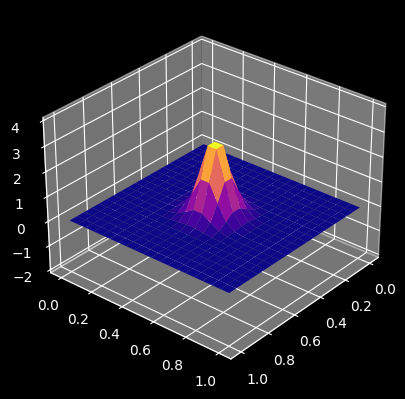

In [ ]:
def update(i):
    ax.clear()

    ax.view_init(elev=30., azim= 40 + i*0.18)
    #surf = ax.plot_surface(X, Y, U_mod[i, :, :])
    surf = ax.plot_surface(X, Y, U_mod[i, :, :], cmap='plasma')
    ax.set_zlim([ u_min, u_max])
    return surf,

salto = 50
U_mod = U[::salto,:,:]
t = U_mod.shape[0]
print(t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', elev=20)
X,Y = np.meshgrid(x,y) # también deberían tener un salto??
#surf = ax.plot_surface(X, Y, U_mod[0, :, :])
surf = ax.plot_surface(X, Y, U_mod[0, :, :], cmap='plasma')

u_max, u_min = U_mod.max(), U_mod.min() 
print(u_max, u_min)
u_max, u_min = 4, -2
start_time = time.time()
ani = animation.FuncAnimation(fig, update, frames=t, blit=False, repeat=False)

ani.save("2D_chat_optimizado_50.gif", fps=24)

#plt.show()

In [ ]:
print("Tiempo usado en crear la animación (s):", time.time() - start_time)

Tiempo usado en crear la animación (s): 33.49779200553894


In [ ]:
"""
lt, lx, ly = 6, 3, 3
U_t = np.zeros([lt,lx,ly])
#print(U_t)

#U[0] = [ [1]*nx for _ in range(ny) ]

for i in range(lx):
  for j in range(ly):
    #U_t[0,i,j] = pos_ini(i,j)
    pass

#x = np.linspace(0, 1, 3)
#y = np.linspace(0, 1, 3)
#U_t[0] = pos_ini(x, y)

#U_t[:,0] = 1
#U_t[:,-1] = 2

U_t[:,:,-1] = 4

print(U_t)

U_t1 = U_t[::2,:,:]
print(U_t1)
"""

'\nlt, lx, ly = 6, 3, 3\nU_t = np.zeros([lt,lx,ly])\n#print(U_t)\n\n#U[0] = [ [1]*nx for _ in range(ny) ]\n\nfor i in range(lx):\n  for j in range(ly):\n    #U_t[0,i,j] = pos_ini(i,j)\n    pass\n\n#x = np.linspace(0, 1, 3)\n#y = np.linspace(0, 1, 3)\n#U_t[0] = pos_ini(x, y)\n\n#U_t[:,0] = 1\n#U_t[:,-1] = 2\n\nU_t[:,:,-1] = 4\n\nprint(U_t)\n\nU_t1 = U_t[::2,:,:]\nprint(U_t1)\n'